In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from mpl_toolkits import mplot3d
import helper_functions as functions
import importlib
importlib.reload(functions)

import warnings
from sklearn.exceptions import ConvergenceWarning

# Ignore ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)


In [21]:
dtypes = {3: 'object', 4: 'object', 5: 'object'}
df = pd.read_csv('asteroids/data/asteroid-dataset/dataset.csv', dtype=dtypes)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958524 entries, 0 to 958523
Data columns (total 45 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              958524 non-null  object 
 1   spkid           958524 non-null  int64  
 2   full_name       958524 non-null  object 
 3   pdes            958524 non-null  object 
 4   name            22064 non-null   object 
 5   prefix          18 non-null      object 
 6   neo             958520 non-null  object 
 7   pha             938603 non-null  object 
 8   H               952261 non-null  float64
 9   diameter        136209 non-null  float64
 10  albedo          135103 non-null  float64
 11  diameter_sigma  136081 non-null  float64
 12  orbit_id        958524 non-null  object 
 13  epoch           958524 non-null  float64
 14  epoch_mjd       958524 non-null  int64  
 15  epoch_cal       958524 non-null  float64
 16  equinox         958524 non-null  object 
 17  e         

In [22]:
df['pha'].value_counts()

pha
N    936537
Y      2066
Name: count, dtype: int64

In [7]:
df_pha = df.query('pha == "Y"')

## How Large are the Potentially Hazardous Asteroids?
By using the Pandas query() method we can query the dataframe and display the data in a histogram plot. It shows the frequency in the y axis and the diameter in the x axis. You can also see the lines that mark the mean and the standard deviation.

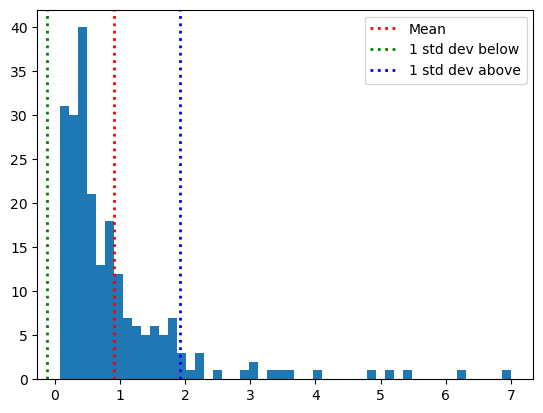

In [8]:
functions.plot_hist_with_mean_std(df_pha, 'diameter')

## How Bright are the Potentially Hazardous Asteroids?
H (Absolute magnitude parameter): This is a measure of the asteroid’s brightness, which can give some indication of its size, and by extension, its potential to cause damage.

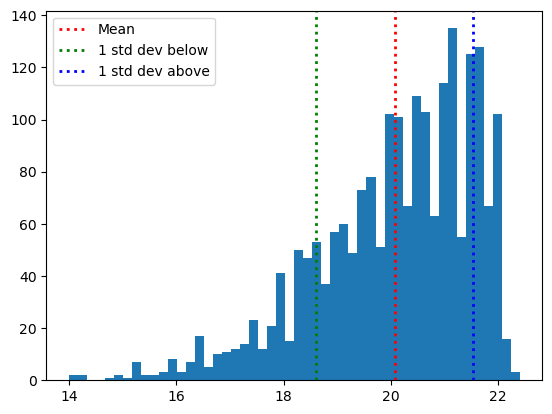

In [9]:
functions.plot_hist_with_mean_std(df_pha, 'H')

## What is the closest they get to Earth?
moid_ld (Earth Minimum Orbit Intersection Distance): This is a measure of how close the asteroid’s orbit comes to Earth’s orbit. Asteroids with smaller MOID values come closer to Earth and could potentially be classified as PHAs.

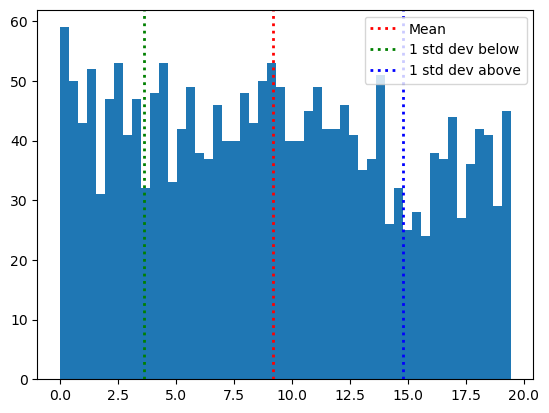

In [10]:
functions.plot_hist_with_mean_std(df_pha, 'moid_ld')

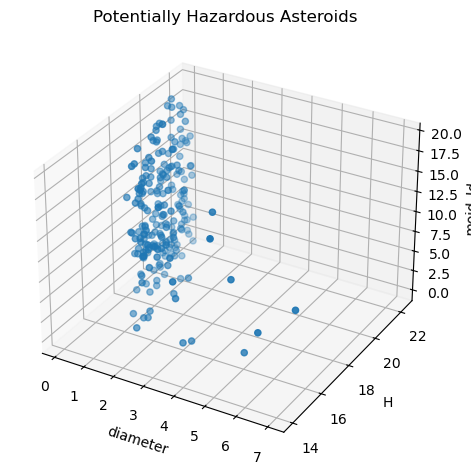

In [11]:
ax = plt.axes(projection = '3d')
ax.scatter3D(df_pha['diameter'], df_pha['H'], df_pha['moid_ld'])
ax.set_xlabel('diameter')
ax.set_ylabel('H')
ax.set_zlabel('moid_ld')
plt.title('Potentially Hazardous Asteroids')
plt.tight_layout();

In [12]:
# Create a new DataFrame without missing values
features = df_pha[['diameter', 'H', 'moid_ld']].dropna()

# Fit the model to your data
KMeans.fit(features)

# Get the cluster assignments for each data point
labels = KMeans.labels_

# Add the cluster labels to your DataFrame
features['cluster'] = labels

TypeError: KMeans.fit() missing 1 required positional argument: 'X'

In [ ]:
ax = plt.axes(projection = '3d')

# Create a scatter plot
scatter = ax.scatter3D(features['diameter'], features['H'], features['moid_ld'], c=features['cluster'])

ax.set_xlabel('diameter')
ax.set_ylabel('H')
ax.set_zlabel('moid_ld')

# Get the unique cluster labels
clusters = np.unique(features['cluster'])

# Create a legend entry for each cluster
for cluster in clusters:
    ax.plot([], [], 'o', color=plt.cm.jet(cluster / len(clusters)), label=f'Cluster {cluster}')

plt.legend()
plt.title('Potentially Hazardous Asteroids')
plt.tight_layout()
plt.show()

## How Large are the Potentially Hazardous Asteroids in Cluster 0?
Based on the clustering we'll look at the diameter feature of the 0 group from the above K-Means cluster plot.

In [13]:
functions.plot_hist_with_mean_std(features.query('cluster == 0'), 'diameter')

UndefinedVariableError: name 'cluster' is not defined

## How Bright are the Potentially Hazardous Asteroids in Cluster 0?
Based on the clustering we'll look at the H feature of the 0 group from the above K-Means cluster plot.

In [ ]:
functions.plot_hist_with_mean_std(features.query('cluster == 0'), 'H')

## How Close to Earth are the Potentially Hazardous Asteroids in Cluster 0?
Based on the clustering we'll look at the  feature of the 0 group from the above K-Means cluster plot.

In [14]:
functions.plot_hist_with_mean_std(features.query('cluster == 0'), 'moid_ld')

UndefinedVariableError: name 'cluster' is not defined

## SUMMARY


We’ve been conducting an exploratory data analysis on a dataset of asteroids, specifically focusing on those that are potentially hazardous (PHAs). We’ve used K-Means clustering to group similar asteroids together based on their features.

K-Means Clustering: We performed K-Means clustering on the dataset using three features: ‘diameter’, ‘H’ (absolute magnitude parameter), and ‘moid_ld’ (Earth Minimum Orbit Intersection Distance). The clustering process grouped similar asteroids together, forming several clusters.

Cluster Selection: After clustering, we chose to focus on the asteroids in Cluster 0 for further analysis.

Feature Analysis: For the asteroids in Cluster 0, we analyzed three features:

Diameter: We plotted a histogram of the diameters of the asteroids in Cluster 0, showing the distribution of their sizes. This gave us an idea of how large these potentially hazardous asteroids are.

H (Absolute Magnitude Parameter): We plotted a histogram of the absolute magnitude parameter of the asteroids in Cluster 0. This parameter is a measure of the asteroid’s brightness, which can give some indication of its size.

moid_ld (Earth Minimum Orbit Intersection Distance): We plotted a histogram of the Earth Minimum Orbit Intersection Distance of the asteroids in Cluster 0. This is a measure of how close the asteroid’s orbit comes to Earth’s orbit. Asteroids with smaller MOID values come closer to Earth and could potentially be classified as PHAs.

Through this process, we’ve gained insights into the characteristics of potentially hazardous asteroids in Cluster 0. This can help us understand what makes an asteroid potentially hazardous and inform future efforts to detect and track PHAs.

How Large are the Potentially Hazardous Asteroids in Cluster 0?

Based on the clustering we'll look at the diameter feature of the 0 group from the above K-Means cluster plot.

[39]:
functions.plot_hist_with_mean_std(features.query('cluster == 0'), 'diameter')
## How Bright are the Potentially Hazardous Asteroids in Cluster 0?
Based on the clustering we'll look at the H feature of the 0 group from the above K-Means cluster plot.
[40]:
functions.plot_hist_with_mean_std(features.query('cluster == 0'), 'H')
How Close to Earth are the Potentially Hazardous Asteroids in Cluster 0?

Based on the clustering we'll look at the feature of the 0 group from the above K-Means cluster plot.

[41]:
functions.plot_hist_with_mean_std(features.query('cluster == 0'), 'moid_ld')

It's a very interesting process to actually, draw patterns from these real data points.

# Can We Predict the Proximity of an Asteroid to Earth Based on Other Features?

In [23]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SequentialFeatureSelector, SelectFromModel
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV

In [24]:
#generate train/test data for df_pha
df_pha_numeric = df_pha.select_dtypes(include=[np.number]).dropna()
X = df_pha_numeric.drop(['moid_ld'], axis = 1)
y = df_pha_numeric['moid_ld']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [25]:
ridge_param_dict = {'ridge__alpha': np.logspace(0, 10, 50)}
ridge_pipe = Pipeline([
    ('scalar', StandardScaler()),
    ('ridge', Ridge())
])
ridge_grid_k5 = GridSearchCV(estimator=ridge_pipe, param_grid=ridge_param_dict, cv=5)
ridge_grid_k5.fit(X_train, y_train)
ridge_grid_k5_train_mse = mean_squared_error(y_train, ridge_grid_k5.best_estimator_.predict(X_train))
ridge_grid_k5_test_mse = mean_squared_error(y_test, ridge_grid_k5.best_estimator_.predict(X_test))

print(f'ridge_grid_k5_train_mse: {ridge_grid_k5_train_mse}')
print(f'ridge_grid_k5_test_mse: {ridge_grid_k5_test_mse}')

ridge_grid_k5_train_mse: 0.014067163172385226
ridge_grid_k5_test_mse: 0.021892423671706872


In [28]:
## SOME ISSUE INDICES ARE OUT OF BOUNDS....
all_indices = list(range(len(df_pha_numeric)))
train_idx, test_idx = np.split(all_indices, [60])

ridge_grid_cv = GridSearchCV(estimator=ridge_pipe, param_grid=ridge_param_dict, cv=[[train_idx, test_idx]])
ridge_grid_cv.fit(X_train, y_train)
ridge_train_cv_mse = mean_squared_error(y_train, ridge_grid_cv.best_estimator_.predict(X_train))
ridge_test_cv_mse = mean_squared_error(y_test, ridge_grid_cv.best_estimator_.predict(X_test))

print(f'ridge_train_cv_mse: {ridge_train_cv_mse}')
print(f'ridge_test_cv_mse: {ridge_test_cv_mse}')

IndexError: indices are out-of-bounds

In [ ]:
# THERE IS SOME ISSEU I THINK DUE TO THE LARGE SIZE OF SAMPLES
ridge_grid_kn = GridSearchCV(estimator=ridge_pipe, param_grid=ridge_param_dict, cv=125)
ridge_grid_kn.fit(X_train, y_train)
ridge_grid_kn_train_mse = mean_squared_error(y_train, ridge_grid_kn.best_estimator_.predict(X_train))
ridge_grid_kn_test_mse = mean_squared_error(y_test, ridge_grid_kn.best_estimator_.predict(X_test))

print(f'ridge_grid_kn_train_mse: {ridge_grid_kn_train_mse}')
print(f'ridge_grid_kn_test_mse: {ridge_grid_kn_test_mse}')

In [34]:
### Figuring out the Degree to use with our function...

train_mses, test_mses, best_model_complexity = functions.get_mse_for_test_and_val_on_lr_degrees(X_train,y_train, X_test, y_test, 1, 5)

print(f'train_mses: {train_mses}')
print(f'test_mses: {test_mses}')
print(f'best_model_complexity: {best_model_complexity}')

train_mses: [6.802469950179722e-24, 7.638322970726074e-15, 2.6733258038129806e-16, 6.6114685127472505e-16, 5.08349634601069e-16]
test_mses: [7.546036799693147e-22, 0.0004894392349438888, 4.848730696794183, 2.1782696480469568, 3.164413870698236]
best_model_complexity: 1


The Complexity that minimized Test Error was: 1


ValueError: x and y must have same first dimension, but have shapes (20,) and (5,)

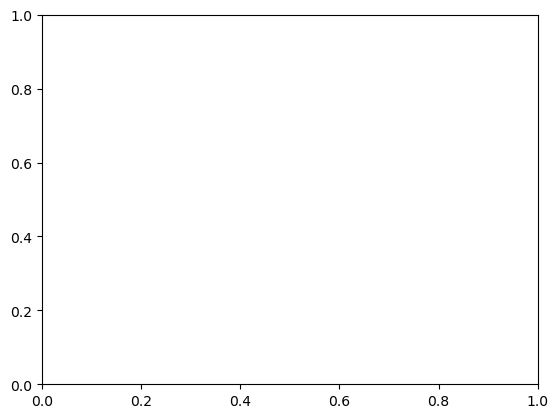

In [35]:
# THIS PLOT IS ALSO NOT WORKING TO VISUALIZE THE ABOVE DATA...

print(f'The Complexity that minimized Test Error was: {test_mses.index(min(test_mses)) + 1}')
    plt.plot(range(1, 21), train_mses, '--o', label = 'training error')
    plt.plot(range(1, 21), test_mses, '--o', label = 'testing error')
    plt.xticks(range(1, 21), range(1, 21))
    plt.xlabel('Degree Complexity')
    plt.ylabel('Mean Squared Error')
    plt.legend();